# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import pandas as pd

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, BatchNormalization, Flatten, LSTM,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import Callback, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Flatten, Input, concatenate, Conv1D, GlobalMaxPooling1D

# Dataset

In [6]:
filePath = 'D:\\New folder (2)\\Emotion_final.csv'
df = pd.read_csv(filePath)
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [8]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [9]:
category = pd.get_dummies(df.Emotion)
df1 = pd.concat([df, category], axis=1)
df1 = df1.drop(columns='Emotion')

# Data Preprocessing

In [10]:
X = df1['Text'].values
y = df1[['happy', 'sadness', 'anger', 'fear', 'love', 'surprise']].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
tokenizer = Tokenizer(num_words = 5000, oov_token='<x>', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

Seq_train = tokenizer.texts_to_sequences(X_train)
Seq_test = tokenizer.texts_to_sequences(X_test)

Pad_train = pad_sequences(Seq_train)
Pad_test = pad_sequences(Seq_test)

# Build The Model

In [14]:
model = Sequential()
model.add(Embedding(input_dim = 5000, output_dim = 128)),
model.add(Conv1D(256,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add (BatchNormalization()),
model.add (Dropout(0.3)),
model.add(Conv1D(128, 5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=2))
model.add (BatchNormalization()),
model.add (Dropout(0.3)),
model.add(LSTM(128))
model.add (Dropout(0.3)),
model.add(Dense(32))
model.add (Dropout(0.3)),
model.add(Dense(6))
model.add(Activation('softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         640000    
                                                                 
 conv1d (Conv1D)             (None, None, 256)         164096    
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 256)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, None, 256)        1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         1

# Train The Model

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    Pad_train, y_train,
    epochs = 60,
    batch_size = 256,
    validation_data = (Pad_test, y_test),
    verbose = 1,
)

Epoch 1/60
68/68 [==============================] - 11s 134ms/step - loss: 1.6565 - accuracy: 0.3051 - val_loss: 1.6305 - val_accuracy: 0.3220
Epoch 2/60
68/68 [==============================] - 9s 129ms/step - loss: 1.5875 - accuracy: 0.3468 - val_loss: 1.6358 - val_accuracy: 0.3220
Epoch 3/60
68/68 [==============================] - 9s 127ms/step - loss: 1.3171 - accuracy: 0.5097 - val_loss: 1.6287 - val_accuracy: 0.4585
Epoch 4/60
68/68 [==============================] - 9s 127ms/step - loss: 0.8228 - accuracy: 0.7066 - val_loss: 1.3591 - val_accuracy: 0.6293
Epoch 5/60
68/68 [==============================] - 9s 127ms/step - loss: 0.5207 - accuracy: 0.8195 - val_loss: 0.9595 - val_accuracy: 0.8024
Epoch 6/60
68/68 [==============================] - 9s 126ms/step - loss: 0.3930 - accuracy: 0.8643 - val_loss: 0.6641 - val_accuracy: 0.8348
Epoch 7/60
68/68 [==============================] - 9s 127ms/step - loss: 0.3207 - accuracy: 0.8865 - val_loss: 0.4519 - val_accuracy: 0.8670
Epoch

# Plot The Graph

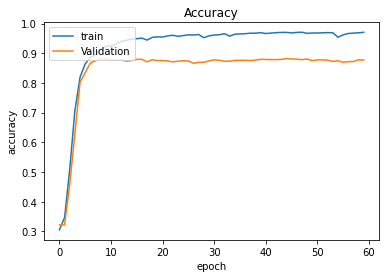

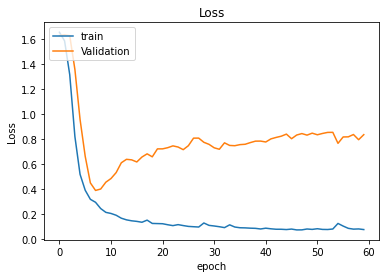

In [32]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()